In [2]:
import pandas as pd
import numpy as np
import sqlite3
from matplotlib import pyplot as plt


# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [3]:
conn = sqlite3.connect('../db.sqlite3')

query = """
SELECT 
restaurant_order.id as order_id,
restaurant_order.datetime as datetime,
restaurant_orderitem.quantity as quantity,
restaurant_product.name as product_name,
restaurant_product.price as product_price

FROM restaurant_order
JOIN 
restaurant_orderitem ON restaurant_orderitem.order_id = restaurant_order.id
JOIN
restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
"""
df = pd.read_sql_query(query, conn)

conn.close()
df.to_csv('output_file.csv', index=False)

data = pd.read_csv('output_file.csv')
data.describe()

,order_id,quantity,product_price
count,74818.000000,74818.000000,74818.000000
mean,5756.303563,1.243564,5.267512
std,3745.827156,0.798207,3.325707
min,1.000000,1.000000,0.500000
25%,2461.000000,1.000000,2.950000
50%,5308.000000,1.000000,3.950000
75%,8913.000000,1.000000,8.950000
max,13397.000000,51.000000,17.950000


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<module 'matplotlib.pyplot' from '/Users/dmitriykim/Documents/mate/py-restaurant-data-analysis/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

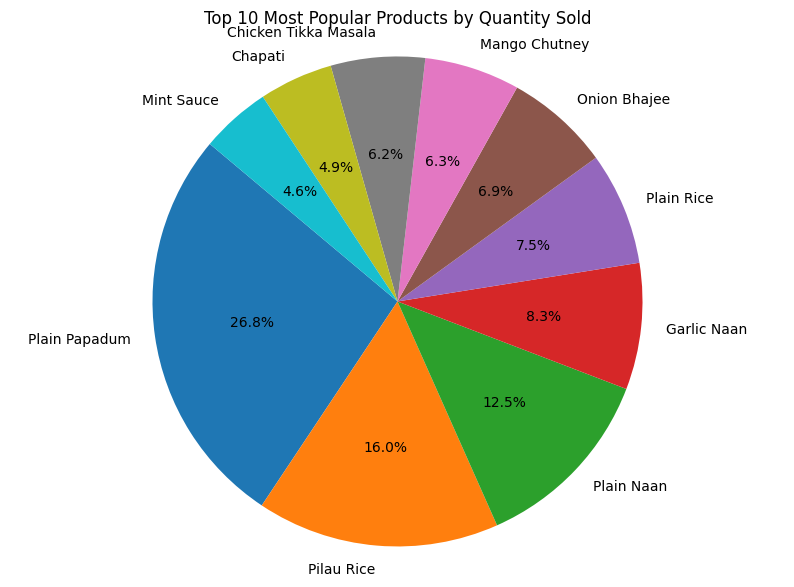

In [26]:
product_counts = data.groupby('product_name')['quantity'].sum().reset_index()

top_10_products = product_counts.sort_values(by='quantity', ascending=False).head(10)

plt.figure(figsize=(10, 7))
plt.pie(top_10_products['quantity'], labels=top_10_products['product_name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Popular Products by Quantity Sold')
plt.axis('equal') 
plt

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

(-1.099998245146719, 1.0999999149314934, -1.099999941820486, 1.099999991711708)

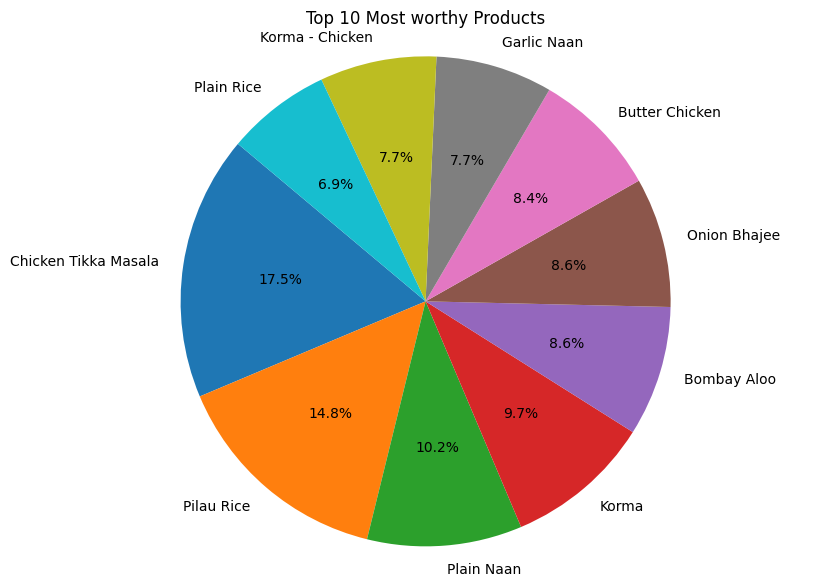

In [40]:
data["Item price"] = data["product_price"] * data["quantity"]
grouped = data.groupby('product_name')["Item price"].sum()
grouped 
sort_top_10_price = grouped.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 7))
plt.pie(sort_top_10_price.values, labels=sort_top_10_price.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most worthy Products')
plt.axis('equal') 


# Task 3
32

Example:

![bar chart](../demo/bar.png)

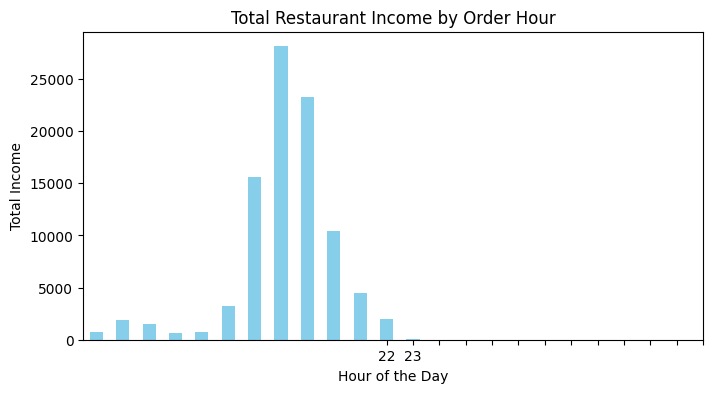

In [18]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['Order Hour'] = data['datetime'].dt.hour
filtered_data = data[(data['Order Hour'] >= 11) & (data['Order Hour'] <= 23)]
grouped_data = filtered_data.groupby('Order Hour')['quantity'].sum()

plt.figure(figsize=(8,4))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Total Restaurant Income by Order Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Income')
plt.xticks(np.arange(11, 24, 1), rotation=0)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

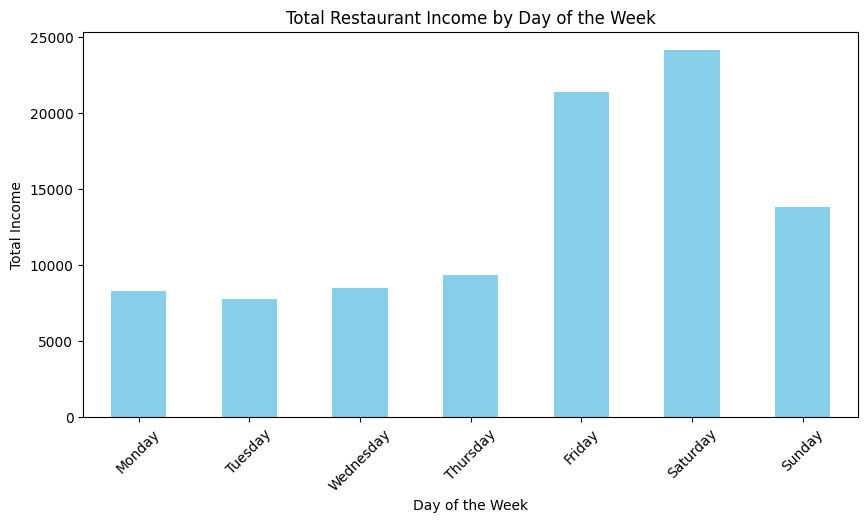

In [19]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['Order Day Of The Week'] = data['datetime'].dt.day_name()

grouped_data = data.groupby('Order Day Of The Week')['quantity'].sum()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data = grouped_data.reindex(order)

plt.figure(figsize=(10,5))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Total Restaurant Income by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.show()
